---

# Elementary Web Scraping

#### Joshua G. Mausolf


---

## Preliminary Steps

In [19]:
#Import NLTK and Texts
import nltk
from nltk import *
from nltk.book import *
from nltk.corpus import stopwords

#Import Web Scraping Modules
from urllib import request
from bs4 import BeautifulSoup

#Command All Matplotlib Graphs to Appear in Inline in Notebook
%matplotlib inline

---

## Elementary Web Scraping Using NLTK and Beautiful Soup

#### *Suppose we want to write a utility function that takes a URL as its argument, and returns the contents of the URL, with all HTML markup removed. *

#### How would we accomplish this?

There are multiple ways of approaching this problem. One method is to follow the example as shown in the [NLTK Book, Chapter 3](http://www.nltk.org/book/ch03.html). This method, however does not fully utilize [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/), and as a result, the output is not exactly the desired content.

HTML is a complex syntax with not only written text of paragraphs but also menu items, drop-down fields, and links, among other facets. If we want to read a content of a given page, we generally are interested in the text content, rather than all content, headers, meta-data, and so forth. 

#### Below, I first demonstrate the NLTK method, which can be used to return a webpage, remove HTML with BeautifulSoup, and tokenize the results.

In [42]:
def nltk_web_read(url, _raw=0, words=1):
    """
    -----------------------------------------------------
    This function returns the text of a website for a
    given url
    -----------------------------------------------------
    OPTIONS
    -----------------------------------------------------
    - _raw = option to return raw text from HTML
            - 0 = no (default)
            - 1 = yes, return raw text
    -----------------------------------------------------
    - words = option to return word tokens from HTML
            - 1 = return all words (default)
            - 2 = return only alphanumeric words
    -----------------------------------------------------
    """
    
    #Import Modules
    from urllib import request
    from bs4 import BeautifulSoup


    response = request.urlopen(url)
    html = response.read().decode('utf-8')

    #Get Text from HTML
    raw = BeautifulSoup(html, "html5lib").get_text()
    raw[:200]
    
    #Options
    
    #Raw Text Option
    if _raw==0:
        pass
    else:
        print (raw[:200])
        #return raw


    #Get Tokens
    tokens = word_tokenize(raw)

    #Word Options

    #All Words
    if words==1:
        print(tokens[:200])
        #return tokens
    
    #Alphanumeric Words
    elif words==2:
        words = [w for w in tokens if w.isalnum()]
        print (words[:200])
        #return words


#### Now that we have defined the function, let's look at the raw text for the NLTK website:

In [43]:
#Get All Raw Content
url = "http://www.nltk.org"   
nltk_web_read(url, 1)


    
    
    Natural Language Toolkit — NLTK 3.0 documentation
    
    
    
    
    
      var DOCUMENTATION_OPTIONS = {
        URL_ROOT:    './',
        VERSION:     '3.0',
        COLLAPSE_IN
['Natural', 'Language', 'Toolkit', '—', 'NLTK', '3.0', 'documentation', 'var', 'DOCUMENTATION_OPTIONS', '=', '{', 'URL_ROOT', ':', "'./", "'", ',', 'VERSION', ':', "'3.0", "'", ',', 'COLLAPSE_INDEX', ':', 'false', ',', 'FILE_SUFFIX', ':', "'.html", "'", ',', 'HAS_SOURCE', ':', 'true', '}', ';', 'NLTK', '3.0', 'documentation', 'next', '|', 'modules', '|', 'index', 'Natural', 'Language', 'Toolkit¶', 'NLTK', 'is', 'a', 'leading', 'platform', 'for', 'building', 'Python', 'programs', 'to', 'work', 'with', 'human', 'language', 'data', '.', 'It', 'provides', 'easy-to-use', 'interfaces', 'to', 'over', '50', 'corpora', 'and', 'lexical', 'resources', 'such', 'as', 'WordNet', ',', 'along', 'with', 'a', 'suite', 'of', 'text', 'processing', 'libraries', 'for', 'classification', ',', 'tokenization', ',

In [44]:
#Get ONLY Raw Text
nltk_web_read(url, 0, 2)

['Natural', 'Language', 'Toolkit', 'NLTK', 'documentation', 'var', 'VERSION', 'false', 'true', 'NLTK', 'documentation', 'next', 'modules', 'index', 'Natural', 'Language', 'NLTK', 'is', 'a', 'leading', 'platform', 'for', 'building', 'Python', 'programs', 'to', 'work', 'with', 'human', 'language', 'data', 'It', 'provides', 'interfaces', 'to', 'over', '50', 'corpora', 'and', 'lexical', 'resources', 'such', 'as', 'WordNet', 'along', 'with', 'a', 'suite', 'of', 'text', 'processing', 'libraries', 'for', 'classification', 'tokenization', 'stemming', 'tagging', 'parsing', 'and', 'semantic', 'reasoning', 'wrappers', 'for', 'NLP', 'libraries', 'and', 'an', 'active', 'discussion', 'forum', 'Thanks', 'to', 'a', 'guide', 'introducing', 'programming', 'fundamentals', 'alongside', 'topics', 'in', 'computational', 'linguistics', 'plus', 'comprehensive', 'API', 'documentation', 'NLTK', 'is', 'suitable', 'for', 'linguists', 'engineers', 'students', 'educators', 'researchers', 'and', 'industry', 'users',

#### We see that parts of the function are still included, such as "'var', 'VERSION', 'false', 'true'". Such results would be misleading and confusing if we wanted to discover the content of the page because we are getting both the text and additional text items embedded in the page that are not necessarily HTML but rather part of the page design.

---

## Diving Into Beautiful Soup with HTML

[**Beautiful Soup**](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) offers another and better option. We can specify that we only want the text of a page, located within a particular HTML tag. While all pages differ, a typical setup is to find text within a paragraph ```<p> .... </p>``` set of tags. Typically, these are in the "body" of the HTML not the head. They are also typically nested under a hierarchy of ```<div>``` tags. 

**Example 1: NLTK Website **

*http://www.nltk.org*

```HTML
            
    <div class="section" id="natural-language-toolkit">
    <h1>Natural Language Toolkit<a class="headerlink" href="#natural-language-toolkit" title="Permalink to this headline">¶</a></h1>
    <p>NLTK is a leading platform for building Python programs to work with human language data.
    It provides easy-to-use interfaces to <a class="reference external" href="http://nltk.org/nltk_data/">over 50 corpora and lexical
    resources</a> such as WordNet,
    along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning,
    wrappers for industrial-strength NLP libraries,
    and an active <a class="reference external" href="http://groups.google.com/group/nltk-users">discussion forum</a>.</p>
    <p>Thanks to a hands-on guide introducing programming fundamentals alongside topics in computational linguistics, plus comprehensive API documentation,
    NLTK is suitable for linguists, engineers, students, educators, researchers, and industry users alike.</p></div>
 
   
```

**Example 2: TheAtlantic Online**

*http://www.theatlantic.com/politics/archive/2016/02/berniebro-revisited/460212/*


``` HTML

<div class="article-body" itemprop="articleBody">
        
        <section id="article-section-1"><p>O reader, hear my plea: I am the victim of semantic drift.</p><p>Four months ago, I <a href="http://www.theatlantic.com/politics/archive/2015/10/here-comes-the-berniebro-bernie-sanders/411070/" data-omni-click="r'article',r'link',r'0',r'460212'">coined the term “Berniebro”</a> to describe a phenomenon I saw on Facebook: Men, mostly my age, mostly of my background, mostly with my political beliefs, were hectoring their friends about how great Bernie was even when their friends wanted to do something else, like talk about the NBA.</p> </section>
    </div>

```

#### Each is only a small snippet of HTML. While we could specify that we only want content in a ``` div class="section" ``` tag, each website varies in terms of the classes provided. It is typically unique to the website design and CSS.

If we generalize to finding all text in paragraphs ```<p>``` subsumed under a ```<div>``` we can get the full text printed for most websites. 

---

## Writing a Beautiful Soup Function

Below I display this function followed by several examples.




In [22]:
def get_website_text(url, div_class=0, _return=0):
    """
    -----------------------------------------------------
    This function returns the text of a website for a
    given URL using Beautiful Soup. 
    
    The URL must be specified.
    
    If you do not know the HTML format but would like to 
    try parsing the URL, run as is. The parser looks for 
    the "div" class. However, depending on the webpage,
    you may need to first inspect the HTML and specify
    a "div class=<input>", where "<input>" could
    be any number of unique strings specific to the 
    website.
    
    After finding the content tag, this function returns
    text in the paragraph <p> tag.
    
    -----------------------------------------------------
    OPTIONS
    -----------------------------------------------------
    - div_class = a specified class of the <div> tag
        - 0 (default)
            - looks for any div tags. Works on some 
            but not all websites.
        - Any string
            - looks for that string as a div class
        
        Example:
        
        get_website_text(url, "content-wrapper")
        
        This input looks for the tag
        
        <div class="content-wrapper">. 
        
    -----------------------------------------------------
    - _return = option to return text for use in another
                function. 
            - 0 = do not return, print instead (default)
            - 1 = return text
    -----------------------------------------------------
    """
    
    #Import Modules
    from urllib import request
    from bs4 import BeautifulSoup

    #Get HTML from URL
    response = request.urlopen(url)
    html = response.read().decode('utf-8')

    #Get Soup for Beautiful Soup
    soup = BeautifulSoup(html, "html5lib")

    #Class Option (Default=0)
    
    #Define Content
    
    #Look for Any Div Tag
    if div_class ==0:
        pass
        content = soup.find("div")
        
        #Parser Content Error Message
        if len(str(content)) < 1000:
            print ("Your request may not be returning the desired results.", '\n' \
                      "Consider inspecting the webpage and trying a different div tag", '\n')
            print ("CURRENT RESULTS:", '\n', content)
        else:
            pass
    
    
    #Look for Specific Div Tag
    else:
        try:
            content = soup.find("div", {"class":str(div_class)})
            
            #Parser Content Error Message
            if len(str(content)) < 1000:
                print ("Your request may not be returning the desired results.", '\n' \
                          "Consider inspecting the webpage and trying a different div tag", '\n')
                print ("CURRENT RESULTS:", '\n', content)
            else:
                pass
            
        #Print Error Message For Failure
        except:
            print ("Error: Please check your div class='input'.", \
                   "A valid 'input' must be specified")
            return

    #Get Paragraph Body
    paragraph = ["".join(x.findAll(text=True)) for x in content.findAll("p")]
    paragraph_body = "\n\n%s" % ("\n\n".join(paragraph))

    
    #Return Function Option
    if _return==1:
        return paragraph_body
    else:
        print (paragraph_body)
        pass


#### Now that we have defined this function, let us try it out.

In [23]:
#Example NLTK Website
url = "http://www.nltk.org"
get_website_text(url)
#get_website_text(url, "content-wrapper")

Your request may not be returning the desired results. 
Consider inspecting the webpage and trying a different div tag 

CURRENT RESULTS: 
 <div class="header-wrapper" role="banner">
      <div class="header">
        <div class="headertitle"><a href="#">NLTK 3.0 documentation</a></div>
        <div aria-label="related navigation" class="rel" role="navigation">
          <a accesskey="N" href="news.html" title="NLTK News">next</a> |
          <a href="py-modindex.html" title="Python Module Index">modules</a> |
          <a accesskey="I" href="genindex.html" title="General Index">index</a>
        </div>
       </div>
    </div>





### So the NLTK website does not happen to be compatible with the specified function. Let us try another website without inspecting the HTML syntax. How about a news article from the [*The Atlantic*](http://www.theatlantic.com/politics/archive/2016/02/berniebro-revisited/460212/)?

![](https://cdn.theatlantic.com/assets/media/img/mt/2016/02/RTX24R4K/lead_960.jpg?1454705860)

In [61]:
#The Atlantic Online
url = "http://www.theatlantic.com/politics/archive/2016/02/berniebro-revisited/460212/"
text = get_website_text(url, 0, 1)

#Print a Subset of the Text
print(text[60:1000])



I coined the term—now I’ve come back to fix what I started.

O reader, hear my plea: I am the victim of semantic drift.

Four months ago, I coined the term “Berniebro” to describe a phenomenon I saw on Facebook: Men, mostly my age, mostly of my background, mostly with my political beliefs, were hectoring their friends about how great Bernie was even when their friends wanted to do something else, like talk about the NBA.

In the post, I tried to gently suggest that maybe there were other ways to advance Sanders’s beliefs, many of which I share. I hinted, too, that I was not talking about every Sanders supporter. I did this subtly, by writing: “The Berniebro is not every Sanders supporter.”

Then, 28,000 people shared the story on Facebook. The Berniebro was alive! Immediately, I started getting emails: Why did I hate progressivism? Why did I joke about politics? And how dare I generalize about every Bernie Sanders supporter?


### So this last example worked. Let's try another from the [White House, Speeches and Remarks](https://www.whitehouse.gov/the-press-office/2016/01/27/remarks-president-righteous-among-nations-award-ceremony) website.

![](https://www.whitehouse.gov/sites/whitehouse.gov/files/letters-header2.jpg)

In [67]:
#The White House
url = "https://www.whitehouse.gov/the-press-office/2016/01/27/remarks-president-righteous-among-nations-award-ceremony"
text = get_website_text(url, 0, 1)

#Print a Subset of the Text
print(text[0:1500])

#To Print All of It
#get_website_text(url)




	Embassy of Israel


	Washington, D.C.


	6:54 P.M. EST


	     THE PRESIDENT:  Thank you.  Thank you.  (Applause.)  Good evening.  Erev Tov. 


	     The Talmud teaches that if a person destroys one life, it is as if they’ve destroyed an entire world, and if a person saves one life, it is as if they’ve saved an entire world.


	What an extraordinary honor to be with you as we honor four Righteous individuals whose courage is measured in the lives they saved -- one child, one refugee, one comrade at a time -- and who, in so doing, helped save our world.


	I deliver a lot of speeches.  Very rarely am I so humbled by the eloquence that has preceded me -- not just in words, but in the acts that we commemorate today.


	To my dear friend, Steven Spielberg, thanks for your moving and generous words.  You spoke of the importance of finding your voice and using it for good, and I know that your work -- whether a masterpiece like Schindler’s List or the stories that you have so persistentl

#### This also works without specifying the HTML syntax. Although not perfect, the text is far more readable output than if we use the prior NLTK method. The improvement here, beyond readability is that we are targeting only text in paragraph tags rather than all text on the website which may have little to do with the content. Note that if we want to analyze the above text using NLTK we would simply set the text as raw text and tokenize.


---

### Returning to NLTK for Some Analysis


In [26]:
raw = get_website_text(url, 0, 1)
tokens = word_tokenize(raw)
print (tokens[:100])

['Embassy', 'of', 'Israel', 'Washington', ',', 'D.C.', '6:54', 'P.M.', 'EST', 'THE', 'PRESIDENT', ':', 'Thank', 'you', '.', 'Thank', 'you', '.', '(', 'Applause', '.', ')', 'Good', 'evening', '.', 'Erev', 'Tov', '.', 'The', 'Talmud', 'teaches', 'that', 'if', 'a', 'person', 'destroys', 'one', 'life', ',', 'it', 'is', 'as', 'if', 'they’ve', 'destroyed', 'an', 'entire', 'world', ',', 'and', 'if', 'a', 'person', 'saves', 'one', 'life', ',', 'it', 'is', 'as', 'if', 'they’ve', 'saved', 'an', 'entire', 'world', '.', 'What', 'an', 'extraordinary', 'honor', 'to', 'be', 'with', 'you', 'as', 'we', 'honor', 'four', 'Righteous', 'individuals', 'whose', 'courage', 'is', 'measured', 'in', 'the', 'lives', 'they', 'saved', '--', 'one', 'child', ',', 'one', 'refugee', ',', 'one', 'comrade', 'at']


In [33]:
# %load word_freq_nltk.py
def words(text, k=10, r=0, sw=0):
    """This functions returns all alphabetic words of
        a specified length for a given text.
        
    Defaults, k=10 and r=0, sw=0.
    -------------------------------------------------    
    - k = the length of the word. 
    -------------------------------------------------
    - r = the evaluation option. 
        It takes values 0 (the default), 1, or 2.
        0. "equals" | len(word) == k
        1. "less than" | len(word) < k.
        2. "greater than" | len(word) > k.
    -------------------------------------------------
    - sw = stop words (English)
        Stop words are high-frequency words like 
        (the, to and also, is), among others.
        
        In this function, sw takes values
        0 (the default) or 1. 

        The function prints an exception 
        statement if other values are entered.
        
    -------------------------------------------------
    """  

    #Not Accounting for Stopwords
    if sw == 0:
        #Option to Return Words == K
        if r == 0:
            ucw = [w.lower() for w in text if w.isalpha() and len(w) == k ]
            return ucw

        #Option to Return Words < K
        elif r == 1:
            ucw = [w.lower() for w in text if w.isalpha() and len(w) < k ]
            return ucw

        #Option to Return Words > K
        elif r == 2:
            ucw = [w.lower() for w in text if w.isalpha() and len(w) > k ]
            return ucw
        else:
            pass
    
    elif sw == 1:
        #Option to Return Words == K
        if r == 0:
            ucw = [w.lower() for w in text if w.lower() not in stopwords.words('english') \
                   and w.isalpha() and len(w) == k]
            return ucw

        #Option to Return Words < K
        elif r == 1:
            ucw = [w.lower() for w in text if w.lower() not in stopwords.words('english') \
                   and w.isalpha() and len(w) < k]
            return ucw

        #Option to Return Words > K
        elif r == 2:
            ucw = [w.lower() for w in text if w.lower() not in stopwords.words('english') \
                   and w.isalpha() and len(w) > k]
            return ucw
        else:
            pass
    
    else:
        print ("Please input a valid stopwords option: 0 = no, 1 = yes")

def freq_words(text, k=10, r=0, n=20, sw=0):
    """This function uses the words function to 
        generate a specified frequency distribtion,
        of the most frequent words and related graph.
        
        You can specify word length, an equality option
        (to look for words =, >, or <) a given length.
        
        You can specify how many words to return and
        if you want to exclude stopwords.
        
    Defaults, k=10 and r=0, n=20, sw.
    -------------------------------------------------    
    - k = the length of the word. 
    -------------------------------------------------
    - r = the evaluation option. 
        It takes values 0 (the default), 1, or 2.
        0. "equals" | len(word) == k
        1. "less than" | len(word) < k.
        2. "greater than" | len(word) > k.
    -------------------------------------------------
    - n = the number of most common results. 
        The default value is 20. For example, if you
        want to see the top 100 results, input 100.
    -------------------------------------------------
    - sw = stop words (English)
        Stop words are high-frequency words like 
        (the, to and also, is), among others.
        
        In this function, sw takes values
        0 (the default) or 1. 

        The function prints an exception 
        statement if other values are entered.
        
    -------------------------------------------------
    """        
    
    #Generate the Frequency Distribution for specified text, k, and r. 
    fdist = FreqDist(words(text, k, r, sw))
    
    #Clean up the Title of the Text
    clean_title0 = str(text).replace("<Text: ", "").replace(">", "").replace('[', '').replace(']', '')
    clean_title1 = clean_title0.replace("'", '').replace('"', '').replace(',', '')[0:10]+"..."
    try:
        c2 = clean_title1.split(" by ")[0].title()
    except:
        c2 = clean_title0.title()
    
    #Creating Possible Titles
    figtitle1 = "Most Frequent "+str(k)+"-Letter Words in "+c2
    figtitle2 = "Most Frequent Words Less Than "+str(k)+"-Letters in "+c2
    figtitle3 = "Most Frequent Words Greater Than "+str(k)+"-Letters in "+c2
    figtitle4 = "Most Frequent Words of Any Length "+c2
    figelse = "Most Frequent Words in "+c2
    
    #Setting the Title Based on Inputs

    if r == 0:
        figtitle = figtitle1
    elif r == 1:
        figtitle = figtitle2
    elif r == 2 and k != 0:
        figtitle = figtitle3
    elif r == 2 and k == 0:
        figtitle = figtitle4
    else:
        print ("else")
        figtitle = figelse

    #Print Plot and Most Common Words
    fdist.plot(n, title=figtitle, cumulative=True)
    print (figtitle+":", '\n', fdist.most_common(n))
    if sw == 1:
        print ("*NOTE: Excluding English Stopwords")
    else:
        pass





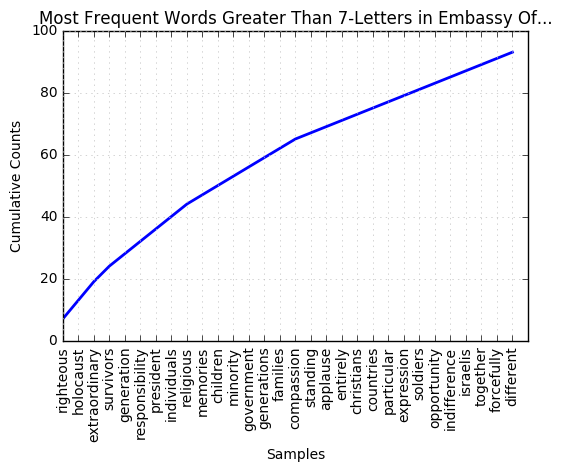

Most Frequent Words Greater Than 7-Letters in Embassy Of...: 
 [('righteous', 7), ('holocaust', 6), ('extraordinary', 6), ('survivors', 5), ('generation', 4), ('responsibility', 4), ('president', 4), ('individuals', 4), ('religious', 4), ('memories', 3), ('children', 3), ('minority', 3), ('government', 3), ('generations', 3), ('families', 3), ('compassion', 3), ('standing', 2), ('applause', 2), ('entirely', 2), ('christians', 2), ('countries', 2), ('particular', 2), ('expression', 2), ('soldiers', 2), ('opportunity', 2), ('indifference', 2), ('israelis', 2), ('together', 2), ('forcefully', 2), ('different', 2)]
*NOTE: Excluding English Stopwords


In [41]:
#Get Top 30 Words > 7 Letter's in President Obama's Embassy Speech
freq_words(tokens, 7, 2, 30, 1)

In [ ]:
freq_words(text5, 0, 2, 50, 1)

### Now that we have established this function's utility for url's, what about the NLTK website, which did not work initially. Well, we can specify the correct ```<div>``` tag and get the results, as shown below:

In [17]:
#Example NLTK Website, Specify the <div class = >
url = "http://www.nltk.org"
get_website_text(url, "content-wrapper")



NLTK is a leading platform for building Python programs to work with human language data.
It provides easy-to-use interfaces to over 50 corpora and lexical
resources such as WordNet,
along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning,
wrappers for industrial-strength NLP libraries,
and an active discussion forum.

Thanks to a hands-on guide introducing programming fundamentals alongside topics in computational linguistics, plus comprehensive API documentation,
NLTK is suitable for linguists, engineers, students, educators, researchers, and industry users alike.
NLTK is available for Windows, Mac OS X, and Linux. Best of all, NLTK is a free, open source, community-driven project.

NLTK has been called “a wonderful tool for teaching, and working in, computational linguistics using Python,”
and “an amazing library to play with natural language.”

Natural Language Processing with Python provides a practical

#### Compared to the first attempt to capture the NLTK website text, the above result is much easier to read and illustrates the main text of the NLTK website versus other menus and behind the scenes text embedded in the HTML.

---